In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import random
import math
import csv
from scipy.stats import poisson 
from scipy.integrate import quad
import sklearn.metrics.pairwise as sk
import seaborn as sns

# Setting Parameters

In [2]:
N_all = 400
n_tasks = 4
n_latent = 2
n_missing_values = 50
n_folds = 1
epochs = 500
plot_interpolation = "None"
missing_experiment = True
kernel = 'Separable_Sum'
folder = '../Data/Synthetic_Experiments/' + kernel + '/Non_Stationary/'

# Importing Data

In [3]:
intensities = np.transpose(np.load(folder + 'sample_intensity.npy'))
outputs_noMissing = np.load(folder + 'outputs_noMissing.npy')
outputs = np.load(folder + 'outputs.npy')
inputs = np.load(folder + 'inputs.npy')
intensities = np.transpose(np.load(folder + 'sample_intensity.npy'))[0] + 15
original_inputs = np.load(folder + 'original_inputs_synthetic.npy')

In [4]:
# Normal Prior Experiment
final_dataset_MT_Normal = np.load(folder + 'final_dataset_Normal_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_Normal = np.load(folder + 'latent_means_Normal_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_Normal = np.load(folder + 'latent_variances_Normal_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_Normal = np.load(folder + 'means_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_Normal = np.load(folder + 'covars_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_Normal = np.load(folder + 'offsets_Normal_MCPM_'+str(missing_experiment)+'.npy')
nelbo_MT_Normal = np.load(folder + 'nelbo_values_Normal_MCPM_'+str(missing_experiment)+'10.npy')
times_Normal = np.load(folder + 'time_iterations_Normal_MCPM_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_Normal = final_dataset_MT_Normal[:,6:10]

In [5]:
# GP Prior Experiment
final_dataset_MT_GP = np.load(folder + 'final_dataset_GP_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_GP = np.load(folder + 'latent_means_GP_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_GP = np.load(folder + 'latent_variances_GP_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_GP = np.load(folder + 'means_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_GP = np.load(folder + 'covars_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_GP = np.load(folder + 'offsets_GP_MCPM_'+str(missing_experiment)+'.npy')
nelbo_MT_GP = np.load(folder + 'nelbo_values_GP_MCPM_'+str(missing_experiment)+'10.npy')
times_GP = np.load(folder + 'time_iterations_GP_MCPM_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_GP = final_dataset_MT_GP[:,6:10]

In [6]:
# LGCP Experiment
final_dataset_MT_LGCP = np.load(folder + 'final_dataset_Normal_LGCP_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_LGCP = np.load(folder + 'latent_means_Normal_LGCP_'+str(missing_experiment)+'.npy')
latent_vars_MT_LGCP = np.load(folder + 'latent_variances_Normal_LGCP_'+str(missing_experiment)+'.npy')
means_w_MT_LGCP = np.load(folder + 'means_weights_Normal_LGCP_'+str(missing_experiment)+'.npy')
vars_w_MT_LGCP = np.load(folder + 'covars_weights_Normal_LGCP_'+str(missing_experiment)+'.npy')
offsets_MT_LGCP = np.load(folder + 'offsets_Normal_LGCP_'+str(missing_experiment)+'.npy')
nelbo_MT_LGCP = np.load(folder + 'nelbo_values_Normal_LGCP_'+str(missing_experiment)+'10.npy')
nelbo_MT_LGCP = np.reshape(nelbo_MT_LGCP,[epochs,n_tasks])
times_LGCP = np.load(folder + 'time_iterations_Normal_LGCP_'+str(missing_experiment)+'10.npy')

# Predictions
predictions_MT_LGCP = final_dataset_MT_LGCP[:,6:10]

## Indeces of Missing Values

In [6]:
index1 = range(10,60)
index1_non_missing1 = range(0,10)
index1_non_missing2 = range(60,200)

index2 = range(30,80)
index2_non_missing1 = range(0,30)
index2_non_missing2 = range(80,200)

index3 = range(140,190)
index3_non_missing1 = range(0,140)
index3_non_missing2 = range(190,200)

index4 = range(50,100)
index4_non_missing1 = range(0,50)
index4_non_missing2 = range(100,200)

indeces_missing = np.transpose(np.reshape(np.concatenate((index1,index2, index3, index4)), 
                                          (n_tasks, n_missing_values)))

# Plotting Results

Text(0.5, 1.0, 'Task 4: Predictions')

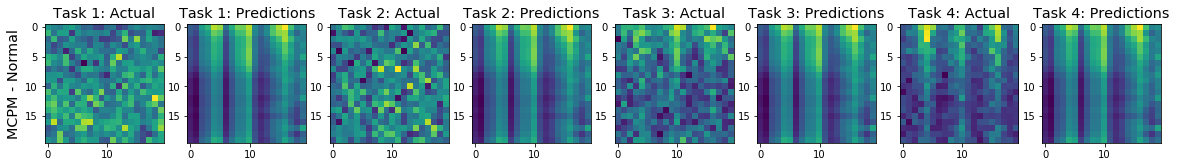

In [7]:
# Plotting Normal Prior Experiment Results
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1,8,figsize=(20,6))
ax1.set_ylabel('MCPM - Normal',fontsize='x-large')

ax1.imshow(outputs_noMissing[:,0].reshape(20,20).T)
ax1.set_title('Task 1: Actual',fontsize='x-large')
ax2.imshow(predictions_MT_Normal[:,0].reshape(20,20).T)
ax2.set_title('Task 1: Predictions',fontsize='x-large')

ax3.imshow(outputs_noMissing[:,1].reshape(20,20).T)
ax3.set_title('Task 2: Actual',fontsize='x-large')
ax4.imshow(predictions_MT_Normal[:,1].reshape(20,20).T)
ax4.set_title('Task 2: Predictions',fontsize='x-large')

ax5.imshow(outputs_noMissing[:,2].reshape(20,20).T)
ax5.set_title('Task 3: Actual',fontsize='x-large')
ax6.imshow(predictions_MT_Normal[:,2].reshape(20,20).T)
ax6.set_title('Task 3: Predictions',fontsize='x-large')

ax7.imshow(outputs_noMissing[:,3].reshape(20,20).T)
ax7.set_title('Task 4: Actual',fontsize='x-large')
ax8.imshow(predictions_MT_Normal[:,3].reshape(20,20).T)
ax8.set_title('Task 4: Predictions',fontsize='x-large')

Text(0.5, 1.0, 'Task 4: Predictions')

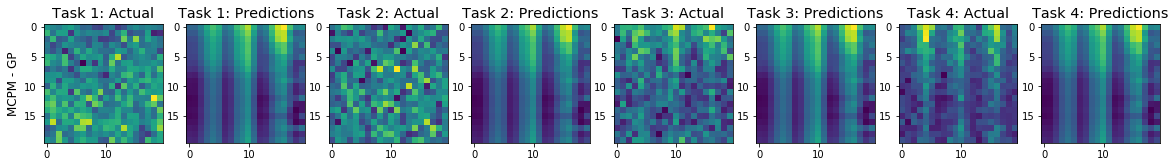

In [8]:
# Plotting Normal Prior Experiment Results
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1,8,figsize=(20,6))
ax1.set_ylabel('MCPM - GP',fontsize='large')

ax1.imshow(outputs_noMissing[:,0].reshape(20,20).T)
ax1.set_title('Task 1: Actual',fontsize='x-large')
ax2.imshow(predictions_MT_GP[:,0].reshape(20,20).T)
ax2.set_title('Task 1: Predictions',fontsize='x-large')

ax3.imshow(outputs_noMissing[:,1].reshape(20,20).T)
ax3.set_title('Task 2: Actual',fontsize='x-large')
ax4.imshow(predictions_MT_GP[:,1].reshape(20,20).T)
ax4.set_title('Task 2: Predictions',fontsize='x-large')

ax5.imshow(outputs_noMissing[:,2].reshape(20,20).T)
ax5.set_title('Task 3: Actual',fontsize='x-large')
ax6.imshow(predictions_MT_GP[:,2].reshape(20,20).T)
ax6.set_title('Task 3: Predictions',fontsize='x-large')

ax7.imshow(outputs_noMissing[:,3].reshape(20,20).T)
ax7.set_title('Task 4: Actual',fontsize='x-large')
ax8.imshow(predictions_MT_GP[:,3].reshape(20,20).T)
ax8.set_title('Task 4: Predictions',fontsize='x-large')

Text(0.5, 1.0, 'Task 4: Predictions')

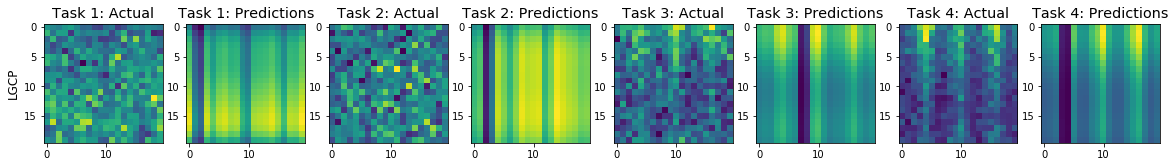

In [10]:
# Plotting LGCP Experiment Results
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1,8,figsize=(20,6))
ax1.set_ylabel('LGCP',fontsize='large')

ax1.imshow(outputs_noMissing[:,0].reshape(20,20).T)
ax1.set_title('Task 1: Actual',fontsize='x-large')
ax2.imshow(predictions_MT_LGCP[:,0].reshape(20,20).T)
ax2.set_title('Task 1: Predictions',fontsize='x-large')

ax3.imshow(outputs_noMissing[:,1].reshape(20,20).T)
ax3.set_title('Task 2: Actual',fontsize='x-large')
ax4.imshow(predictions_MT_LGCP[:,1].reshape(20,20).T)
ax4.set_title('Task 2: Predictions',fontsize='x-large')

ax5.imshow(outputs_noMissing[:,2].reshape(20,20).T)
ax5.set_title('Task 3: Actual',fontsize='x-large')
ax6.imshow(predictions_MT_LGCP[:,2].reshape(20,20).T)
ax6.set_title('Task 3: Predictions',fontsize='x-large')

ax7.imshow(outputs_noMissing[:,3].reshape(20,20).T)
ax7.set_title('Task 4: Actual',fontsize='x-large')
ax8.imshow(predictions_MT_LGCP[:,3].reshape(20,20).T)
ax8.set_title('Task 4: Predictions',fontsize='x-large')

# Computing Performance of Experiments

In [9]:
# Creating Arrays for Performance Metrics
RMSE_MT_Normal = np.zeros((n_tasks))
RMSE_MT_GP = np.zeros((n_tasks))
RMSE_MT_LGCP = np.zeros((n_tasks))

NLPL_MT_Normal = np.zeros((n_tasks))
NLPL_MT_GP = np.zeros((n_tasks))
NLPL_MT_LGCP = np.zeros((n_tasks))

for task in range(n_tasks):
    RMSE_MT_Normal[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - predictions_MT_Normal[indeces_missing[:,task],task]))/n_missing_values)
    RMSE_MT_GP[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - predictions_MT_GP[indeces_missing[:,task],task]))/n_missing_values)
    #RMSE_MT_LGCP[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - predictions_MT_LGCP[indeces_missing[:,task],task]))/n_missing_values)
    NLPL_MT_Normal[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),predictions_MT_Normal[indeces_missing[:,task],task]))/n_missing_values
    NLPL_MT_GP[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),predictions_MT_GP[indeces_missing[:,task],task]))/n_missing_values
    #NLPL_MT_LGCP[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),predictions_MT_LGCP[indeces_missing[:,task],task]))/n_missing_values

In [10]:
# Printing Normal MT Results
print('RMSE (Normal):', RMSE_MT_Normal)
print('NLPL (Normal):', NLPL_MT_Normal)
print('Total Time (Normal):', times_Normal)
print('Time per Epoch:', times_Normal/epochs)

RMSE (Normal): [ 8.30271961 10.24893792  7.47822847 21.69318275]
NLPL (Normal): [4.32390021 5.0719472  3.5501295  7.66466836]
Total Time (Normal): [40.78060985]
Time per Epoch: [0.08156122]


In [11]:
# Printing GP MT Results
print('RMSE (GP):', RMSE_MT_GP)
print('NLPL (GP):', NLPL_MT_GP)
print('Total Time (Normal):', times_GP)
print('Time per Epoch:', times_GP/epochs)

RMSE (GP): [ 7.39880128  7.77496408  7.20598584 19.60241071]
NLPL (GP): [3.85132921 3.84952829 3.48903585 6.56286684]
Total Time (Normal): [41.05988073]
Time per Epoch: [0.08211976]


In [14]:
# Printing LGCP Results
print('RMSE (LGCP):', RMSE_MT_LGCP)
print('NLPL (LGCP):', NLPL_MT_LGCP)
print('Total Time (Normal):', np.sum(times_LGCP[0],axis=1)[0])
print('Time per Epoch:', np.sum(times_LGCP[0],axis=1)[0]/epochs)

RMSE (LGCP): [ 7.87776054 13.53898146 19.51050939 44.83610107]
NLPL (LGCP): [ 4.13097205  8.15297996 14.57843054 55.90463758]
Total Time (Normal): 173.53342962265015
Time per Epoch: 0.3470668592453003


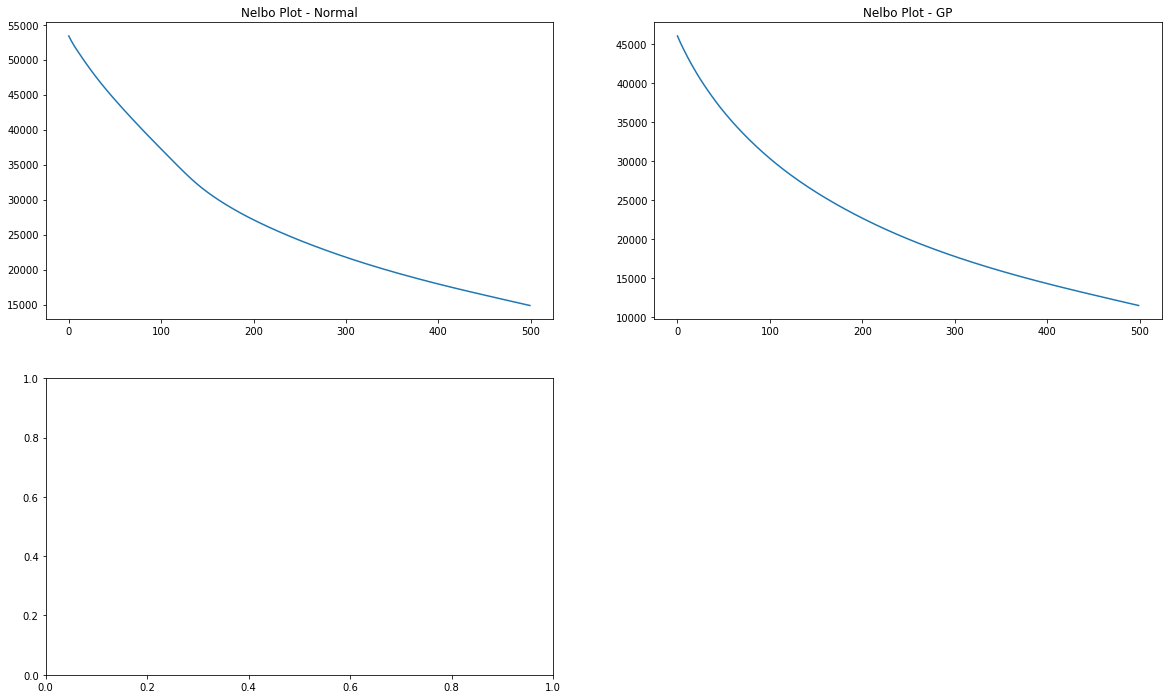

In [12]:
# Plotting Nelbo Values
plt.figure(figsize=(20,12))
ax1 = plt.subplot(221)
ax1.plot(nelbo_MT_Normal)
ax1.title.set_text('Nelbo Plot - Normal')

ax2 = plt.subplot(222)
ax2.plot(nelbo_MT_GP)
ax2.title.set_text('Nelbo Plot - GP')

ax3 = plt.subplot(223)
#ax3.plot(nelbo_MT_LGCP)
#ax3.title.set_text('Nelbo Plot - LGCP')